In [ ]:
"""
Gibbs sampling is a more specific version of Metropolis-Hastings algoithm where 
we employ conditional probability distributions to guide our sample selection.

Gibbs sampling can be employed to solve a number of problems that have a
generative component.

This example will cover the bivariate and multivariate disributions.

Computations are performed integer and matrix wise. The examples can be
integrated into other workflows.
"""

'\nGibbs sampling is a more specific version of Metropolis-Hastings algoithm where \nwe employ conditional probability distributions to guide our sample selection.\n\nGibbs sampling can be employed to solve a number of problems that have a generative\ncomponent.\n\nThis example will cover the bivariate disributions.\n\nComputation is not perform matrix wise. The examples can be integrated into other\nworkflows.\n'

In [1]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Define conditional sampling 

def sample(x,mus,sigmas):

  """(can be used for a bivariate case as well)

  #Arguments:
    x, array(int/float): sample value
    mus, array(int/float): mean values for GD sampling
    sigmas, array(int/float): standard deviation values for GD sampling
  #Returns:
    y, array(int/float): a sampled value using the GD based on mu and sigmas
  """
  #The operations are not matrix based 
  mu=mus[1]+(sigmas[0][1]/sigmas[1][1])*(x-mus[0]) 
  sigma=sigmas[1][1]-(sigmas[0][1]/sigmas[0][0])*sigmas[0][1]

  return np.random.normal(mu,sigma)

In [3]:
#Define Gibbs sampler

def GibbsSampling2D(mus,sigmas,iter=1000):

  """
  Sample drawing from bivariate Gaussian distribution.

  #Arguments:
    
    mus, array(int/float): mean values for GD sampling
    sigmas, array(int/float): standard deviation values for GD sampling
    n, int: standard deviation values for GD sampling
  #Returns:
    y, array(int/float): sampled values using the defined GD
  """
  
  samples=[]
  #get a random value
  x1=np.random.rand(1)[0]

  
  for i in range(iter):
    
    #sample x1 based on mu and sigmas set for the distribution
    x2=sample(x1,mus,sigmas)

    #sample x2 based on mu and sigmas set for the distribution
    x1=sample(x2,mus.T,sigmas.T)
    
    samples+=[[x1,x2]]
    
  return samples


In [15]:
#Define test parameters
mus=np.asarray([0.25,0.5])
sigmas=np.asarray([[1,0.25],[0.25,1]])

#Sample values
results=GibbsSampling2D(mus,sigmas)

x,y=zip(*results)

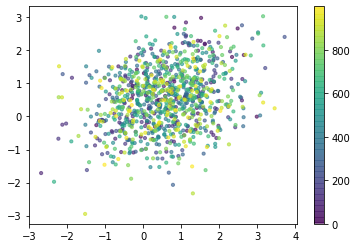

In [16]:
#Data sampling path from the first values to more precice values
plt.scatter(x,y,c=list(range(1000)),s=10,alpha=0.6)
plt.colorbar()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


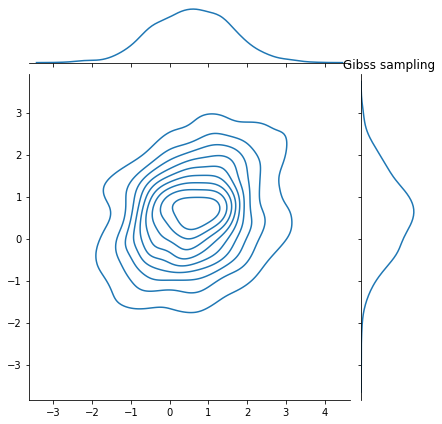

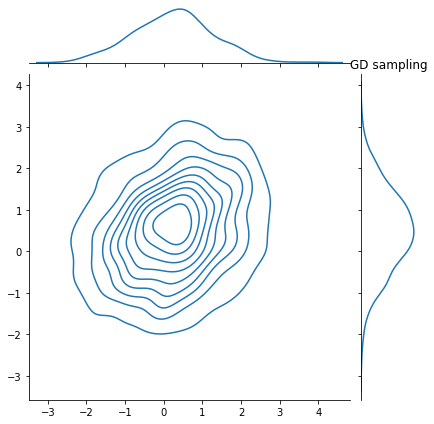

In [17]:
#Compare results with normal Gaussian distribution sampling
GD_samples=np.random.multivariate_normal(mus,sigmas,1000)

sns.jointplot(x,y,kind='kde')
plt.title("Gibss sampling")
sns.jointplot(GD_samples[:,0],GD_samples[:,1],kind='kde')
plt.title("GD sampling")
plt.show()

In [7]:
import scipy as sc
def RBF(X1,X2):
  #RFB kernel
  return np.exp(-0.5*(sc.spatial.distance.cdist(X1,X2,'sqeuclidean')))


In [8]:
def multi_sample(mu1,X1,X2,y1):

  sigma11=RBF(X1,X1)
  sigma12=RBF(X1,X2)
  sigma21=RBF(X2,X1)
  sigma22=RBF(X2,X2)

  vals=sigma21@np.linalg.inv(sigma11)
  mu2=mu1+vals@y1
  
  sigma2=sigma22-vals@sigma12
  
  return mu2,sigma2

In [9]:
#Gaussian process based multinomial sampling

#Initiate data points

X1=np.expand_dims(np.linspace(-5,5,2),1) #Prior search space
mu_s=np.array([0.1,2]) #np.zeros(2) you can set a normal distribution mean or specify mean that you want to sample
sigma_s= np.array([[1.0,0.1],[0.1,1]])#RBF(X1,X1) you can set a normal distribution sigma or specify sigma that you want to sample
y1=np.random.multivariate_normal(mu_s,sigma_s,1)[0] #sample conditional observation

X2=np.expand_dims(np.linspace(-10,10,2),1) #define posterior search space
samples=[]
for i in range(1000):
  #You can adjust X1,X2 or keep to maintain mean and sigma unchaded
  mu_s,sigma_s=multi_sample(mu_s,X1,X2,y1)
  y1=np.random.multivariate_normal(mu_s,sigma_s,1)[0]
  samples.append(y1)
  #X1=np.expand_dims(np.linspace(-10,10,2),1)
  #X2=np.expand_dims(np.linspace(-100,100,2),1)
  
print(samples[1:10])

[array([-0.06595469,  2.40905155]), array([0.62823462, 0.84935625]), array([1.09266137, 1.81838477]), array([0.16919339, 1.54234397]), array([0.47820229, 1.82092838]), array([-0.85113851,  0.93780647]), array([0.02647691, 4.11118742]), array([-0.09027054,  3.44717226]), array([0.73870146, 1.77415412])]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


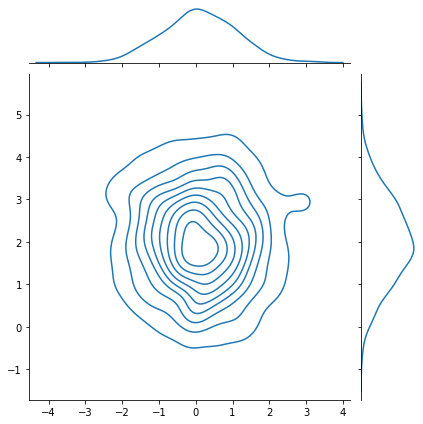

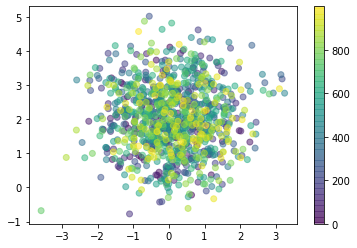

In [10]:
x,y=zip(*samples)
sns.jointplot(x,y,kind='kde')
plt.show()
plt.scatter(x,y,c=list(range(1000)),alpha=0.5)
plt.colorbar()
plt.show()